In [ ]:
!pip install lime shap imbalanced-learn

  fam_asthma  fam_sens  diseases  sensitivity  smoke  prev_work_prob  \
0          1         1         1            0      0               4   
1          1         1         1            0      0               4   
2          1         1         1            0      0               4   
3          1         1         1            0      0               4   
4          1         1         1            0      0               4   

   medication  prev_sleep_dist  chest_tight  prev_attack  ...  doct_vis  \
0           4                3            2            2  ...         0   
1           4                3            2            2  ...         0   
2           4                3            2            2  ...         0   
3           4                3            2            2  ...         0   
4           4                3            2            2  ...         0   

    pefr  medc_usage  pefr_percentage  pefr_lable  Temp  Humidity  Wind  AQI  \
0  300.0           3        66.25149

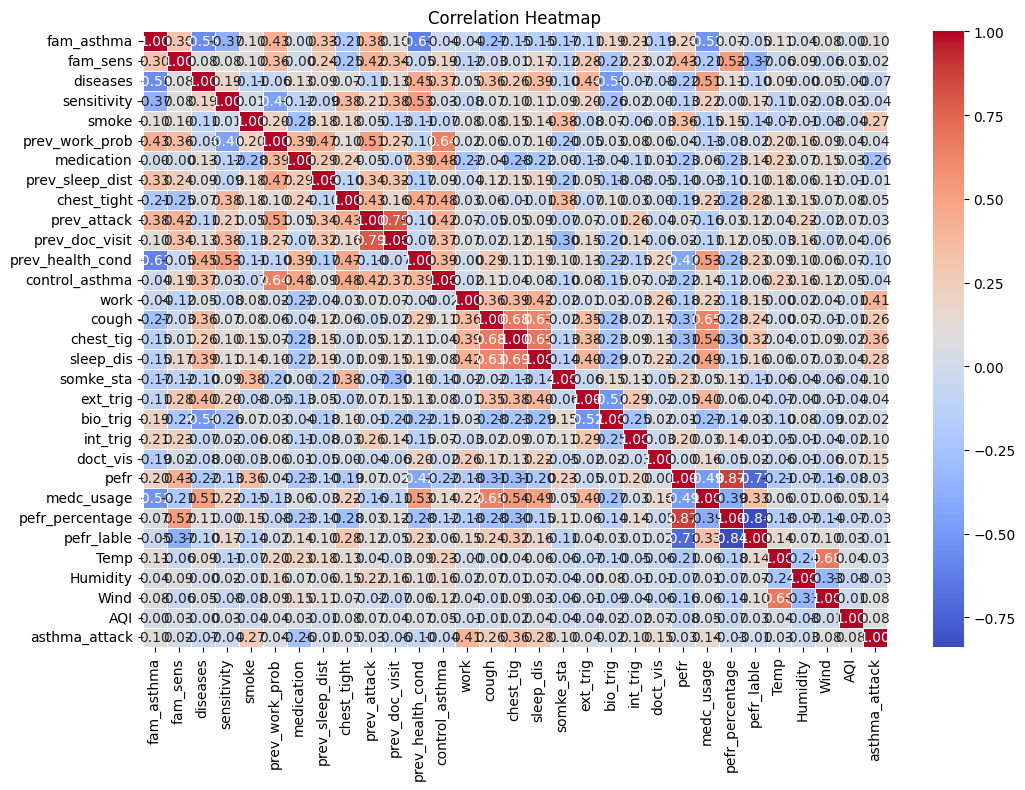

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/FDS-data.csv')
# df = pd.read_csv("D:\\ASEB CSE22060\\SEM 5\\Data Science\\Project resources\\Dataset\\data with reduced dataset and balanced classes.csv")
print(df.head())
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

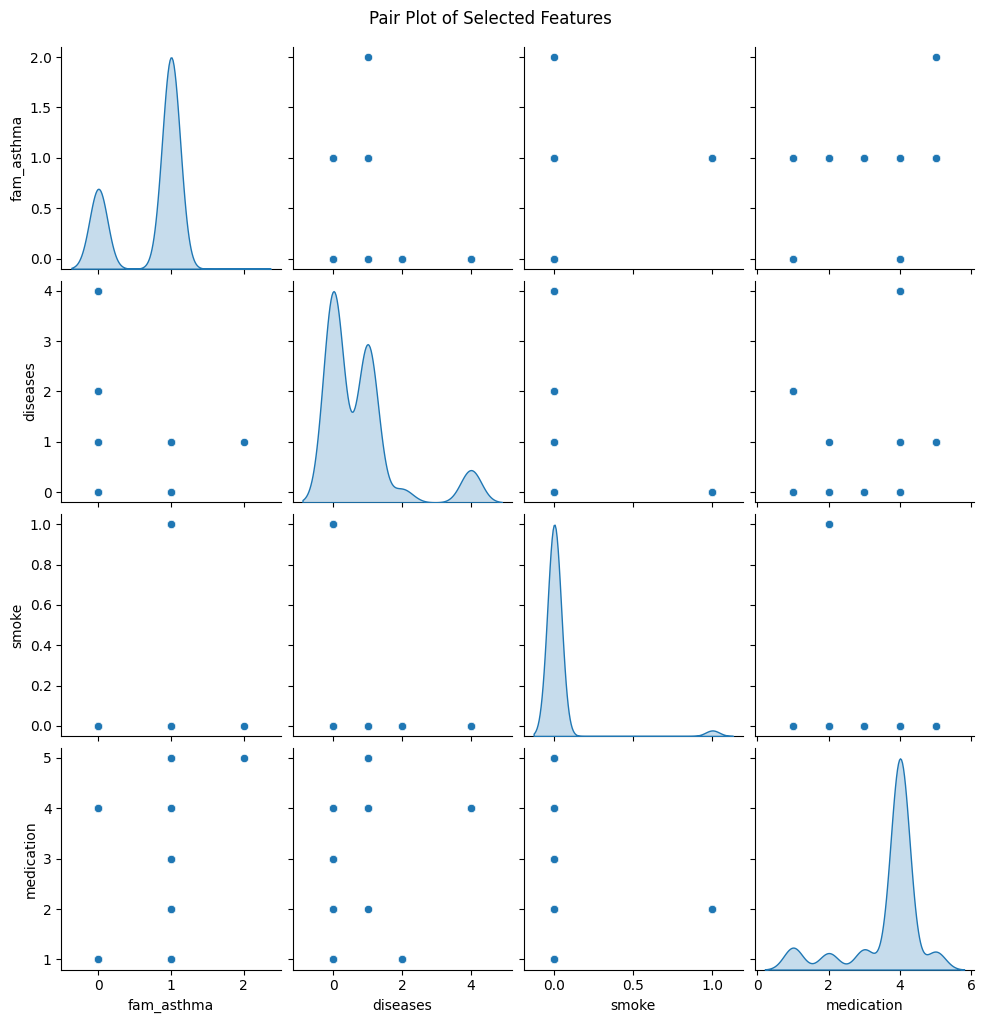

In [ ]:
import seaborn as sns

sns.pairplot(df, vars=['fam_asthma', 'diseases', 'smoke', 'medication'], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features ', y=1.02)
plt.show()


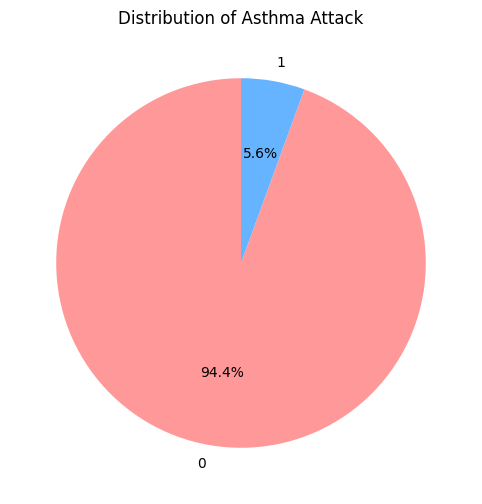

In [ ]:
asthma_attack_counts =df['asthma_attack'].value_counts()
plt.figure(figsize=(8, 6))
asthma_attack_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Asthma Attack')
plt.ylabel('')
plt.show()


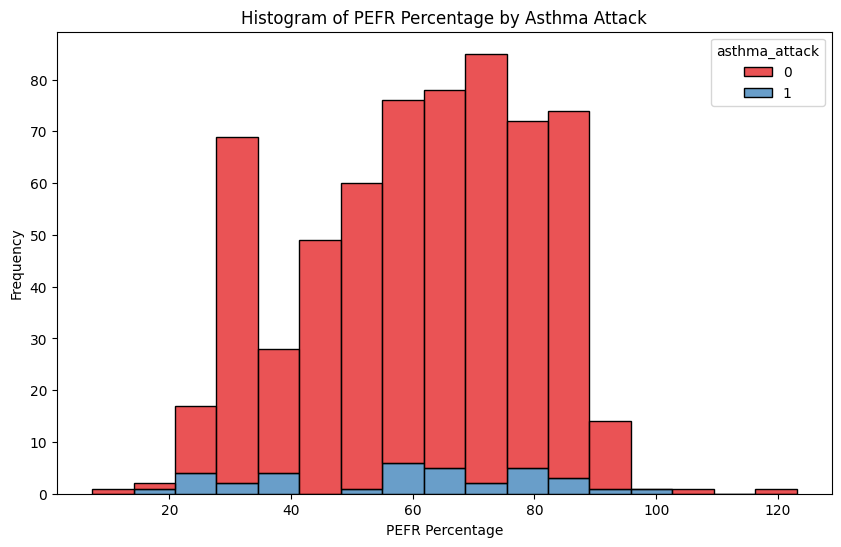

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='pefr_percentage', hue='asthma_attack', multiple='stack', palette='Set1')
plt.title('Histogram of PEFR Percentage by Asthma Attack')
plt.xlabel('PEFR Percentage')
plt.ylabel('Frequency')
plt.show()


<ipython-input-5-216c4be41ec4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='asthma_attack', y='AQI', data=df, palette='Set2')


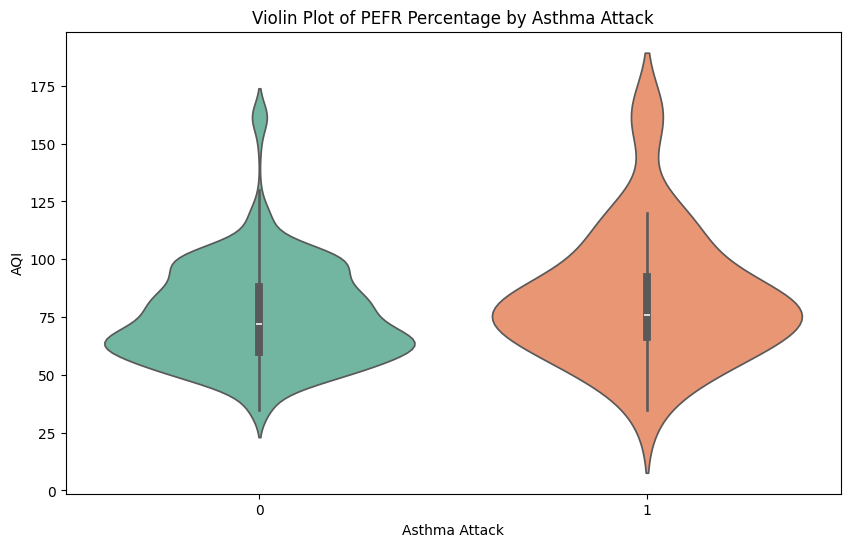

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='asthma_attack', y='AQI', data=df, palette='Set2')
plt.title('Violin Plot of PEFR Percentage by Asthma Attack')
plt.xlabel('Asthma Attack')
plt.ylabel('AQI')
plt.show()

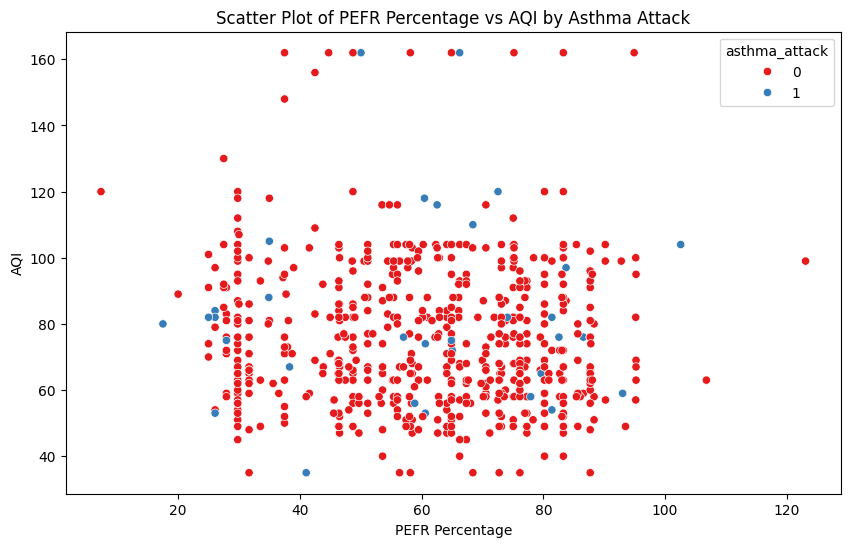

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pefr_percentage', y='AQI', hue='asthma_attack', palette='Set1')
plt.title('Scatter Plot of PEFR Percentage vs AQI by Asthma Attack')
plt.xlabel('PEFR Percentage')
plt.ylabel('AQI')
plt.show()

<ipython-input-7-0fdc26897cb4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='asthma_attack', y='pefr_percentage', data=df, palette='Set2')


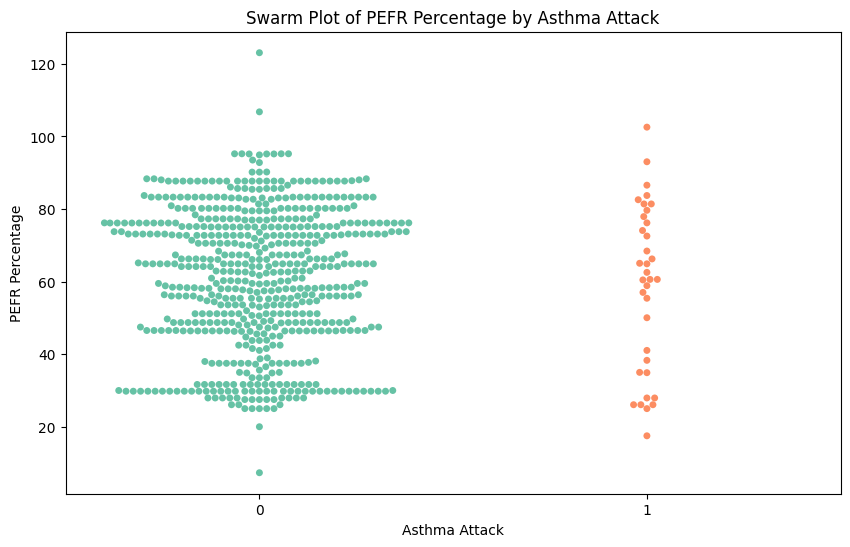

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='asthma_attack', y='pefr_percentage', data=df, palette='Set2')
plt.title('Swarm Plot of PEFR Percentage by Asthma Attack')
plt.xlabel('Asthma Attack')
plt.ylabel('PEFR Percentage')
plt.show()

In [ ]:
threshold = len(df) * 0.8
columns_to_drop = df.columns[df.isnull().sum() > threshold]
df_cleaned = df.drop(columns=columns_to_drop)
print(df_cleaned.head())
num_rows = df.shape[0]

print(f'Number of rows: {num_rows}')
num_rows = df_cleaned.shape[0]

print(f'Number of rows: {num_rows}')

   fam_asthma  fam_sens  diseases  sensitivity  smoke  prev_work_prob  \
0           1         1         1            0      0               4   
1           1         1         1            0      0               4   
2           1         1         1            0      0               4   
3           1         1         1            0      0               4   
4           1         1         1            0      0               4   

   medication  prev_sleep_dist  chest_tight  prev_attack  ...  doct_vis  \
0           4                3            2            2  ...         0   
1           4                3            2            2  ...         0   
2           4                3            2            2  ...         0   
3           4                3            2            2  ...         0   
4           4                3            2            2  ...         0   

    pefr  medc_usage  pefr_percentage  pefr_lable  Temp  Humidity  Wind  AQI  \
0  300.0           3        66

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
df = pd.read_csv('FDS-data.csv')

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate the features and the target variable
X = df.drop('asthma_attack', axis=1)
y = df['asthma_attack']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Select the top features (e.g., top 10)
top_features = feature_importances_df.head(10)

print(top_features)

df_res = pd.concat([X_res, y_res], axis=1)
a = df_res['asthma_attack']
# Verify the new class distribution
print(f'Original dataset shape: {Counter(y)}')
print(f'Resampled dataset shape: {Counter(y_res)}')

# Ensure top_features contains the names of the top 10 features
top_features_list = top_features['Feature'].tolist()

# Select these features from the DataFrame df_res to create A
A = df_res[top_features_list]

b = df_res['asthma_attack']

# Combine A and b into a single DataFrame
combined_df = pd.concat([A, b], axis=1)
print(A.head())

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)

            Feature  Importance
6        medication    0.405886
22             pefr    0.115000
24  pefr_percentage    0.086258
15        chest_tig    0.043726
9       prev_attack    0.037182
10   prev_doc_visit    0.035033
3       sensitivity    0.034095
26             Temp    0.030541
2          diseases    0.025657
18         ext_trig    0.025557
Original dataset shape: Counter({0: 593, 1: 35})
Resampled dataset shape: Counter({0: 593, 1: 593})
   medication   pefr  pefr_percentage  chest_tig  prev_attack  prev_doc_visit  \
0           4  300.0        66.251491          2            2               2   
1           4  400.0        88.335321          3            2               2   
2           4  350.0        77.293406          3            2               2   
3           4  300.0        66.251491          2            2               2   
4           4  350.0        77.293406          2            2               2   

   sensitivity  Temp  diseases  ext_trig  
0            0  31

<ipython-input-10-fd04f753c6a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='asthma_attack', y='pefr_percentage', data=df_res, palette='Set2')


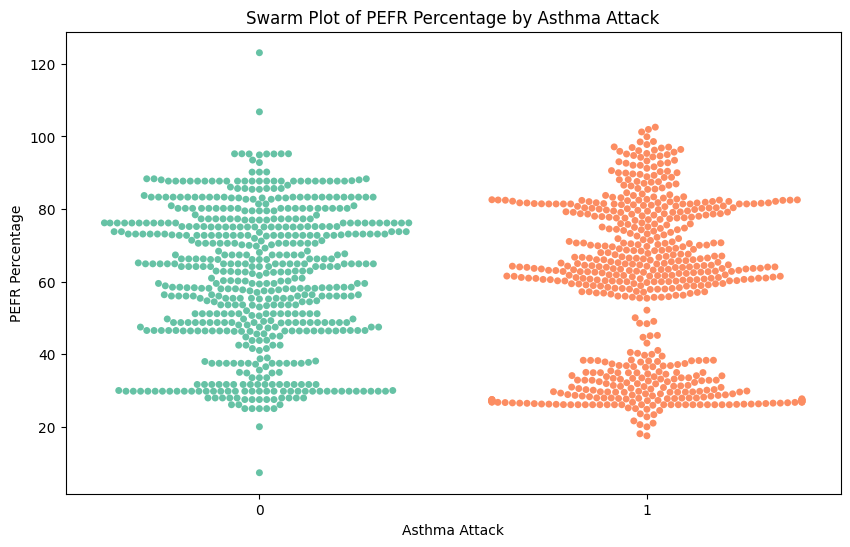

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='asthma_attack', y='pefr_percentage', data=df_res, palette='Set2')
plt.title('Swarm Plot of PEFR Percentage by Asthma Attack')
plt.xlabel('Asthma Attack')
plt.ylabel('PEFR Percentage')
plt.show()

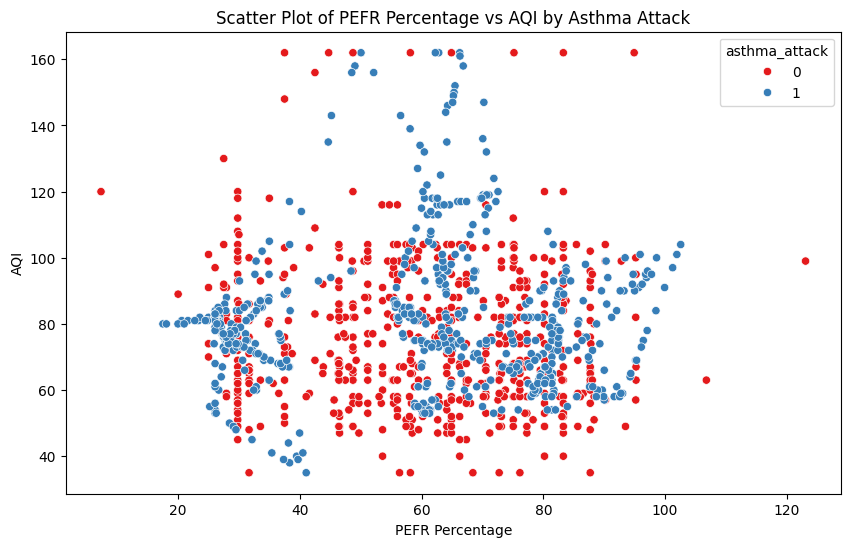

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_res, x='pefr_percentage', y='AQI', hue='asthma_attack', palette='Set1')
plt.title('Scatter Plot of PEFR Percentage vs AQI by Asthma Attack')
plt.xlabel('PEFR Percentage')
plt.ylabel('AQI')
plt.show()

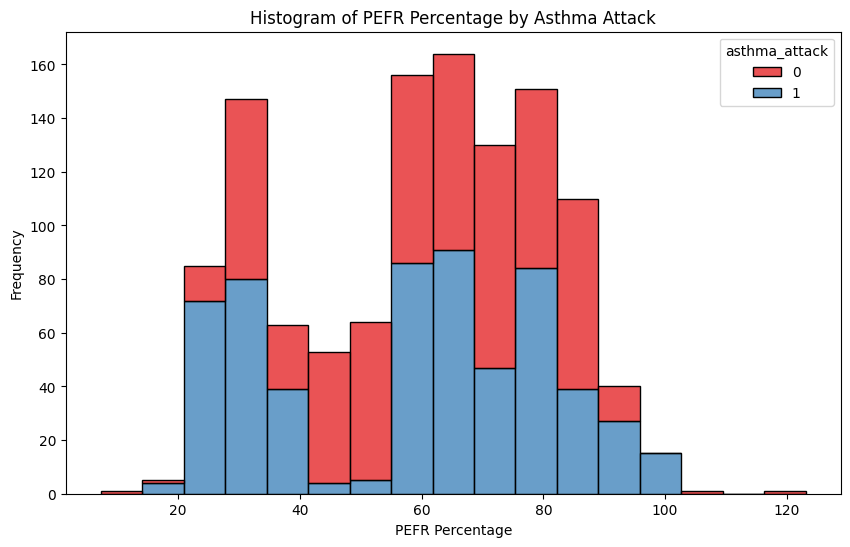

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_res, x='pefr_percentage', hue='asthma_attack', multiple='stack', palette='Set1')
plt.title('Histogram of PEFR Percentage by Asthma Attack')
plt.xlabel('PEFR Percentage')
plt.ylabel('Frequency')
plt.show()


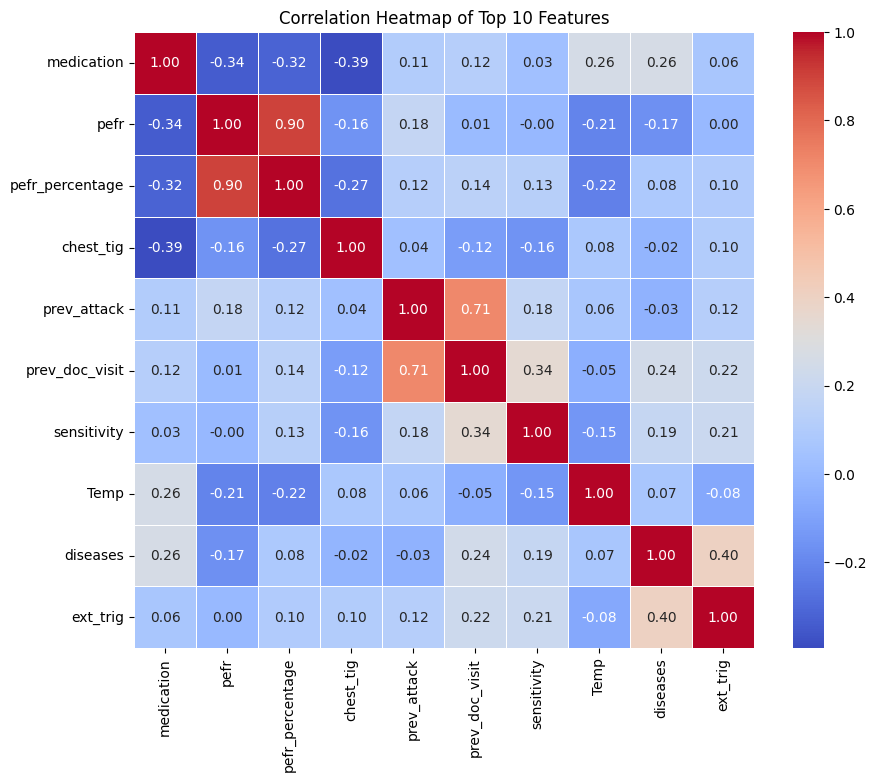

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the top 10 features
corr_matrix_top_features = A.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_top_features, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Top 10 Features')
plt.show()

Classifier: Random Forest
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       121
           1       0.98      0.99      0.99       117

    accuracy                           0.99       238
   macro avg       0.99      0.99      0.99       238
weighted avg       0.99      0.99      0.99       238

------------------------------------------------------------
Classifier: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       121
           1       0.94      1.00      0.97       117

    accuracy                           0.97       238
   macro avg       0.97      0.97      0.97       238
weighted avg       0.97      0.97      0.97       238

------------------------------------------------------------
Classifier: Support Vector Machine
              precision    recall  f1-score   support

           0       0.85      0.55      0.67       121
           1       0.6

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       121
           1       0.95      0.99      0.97       117

    accuracy                           0.97       238
   macro avg       0.97      0.97      0.97       238
weighted avg       0.97      0.97      0.97       238

------------------------------------------------------------
Classifier: Gradient Boosting
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       121
           1       0.98      0.99      0.99       117

    accuracy                           0.99       238
   macro avg       0.99      0.99      0.99       238
weighted avg       0.99      0.99      0.99       238

------------------------------------------------------------
Classifier: AdaBoost
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       121
           1       0.96      1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: MLP Classifier
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       121
           1       0.94      1.00      0.97       117

    accuracy                           0.97       238
   macro avg       0.97      0.97      0.97       238
weighted avg       0.97      0.97      0.97       238

------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classifier: Random Forest
Accuracy: 0.9758
Precision: 0.9731
Recall: 0.9790
F1: 0.9759
------------------------------------------------------------
Classifier: Logistic Regression
Accuracy: 0.9346
Precision: 0.9182
Recall: 0.9559
F1: 0.9363
------------------------------------------------------------
Classifier: Support Vector Machine
Accuracy: 0.6994
Precision: 0.6596
Recall: 0.8340
F1: 0.7358
------------------------------------------------------------
Classifier: K-Nearest Neighbors
Accuracy: 0.8850
Precision: 0.8370
Recall: 0.9579
F1: 0.8932
------------------------------------------------------------
Classifier: Decision Tree
Accuracy: 0.9663
Precision: 0.9606
Recall: 0.9727
F1: 0.9666
------------------------------------------------------------
Classifier: Gradient Boosting
Accuracy: 0.9747
Precision: 0.9690
Recall: 0.9811
F1: 0.9749
------------------------------------------------------------
Classifier: AdaBoost
Accuracy: 0.9610
Precision: 0.9547
Recall: 0.9686
F1: 0.9614
-----

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


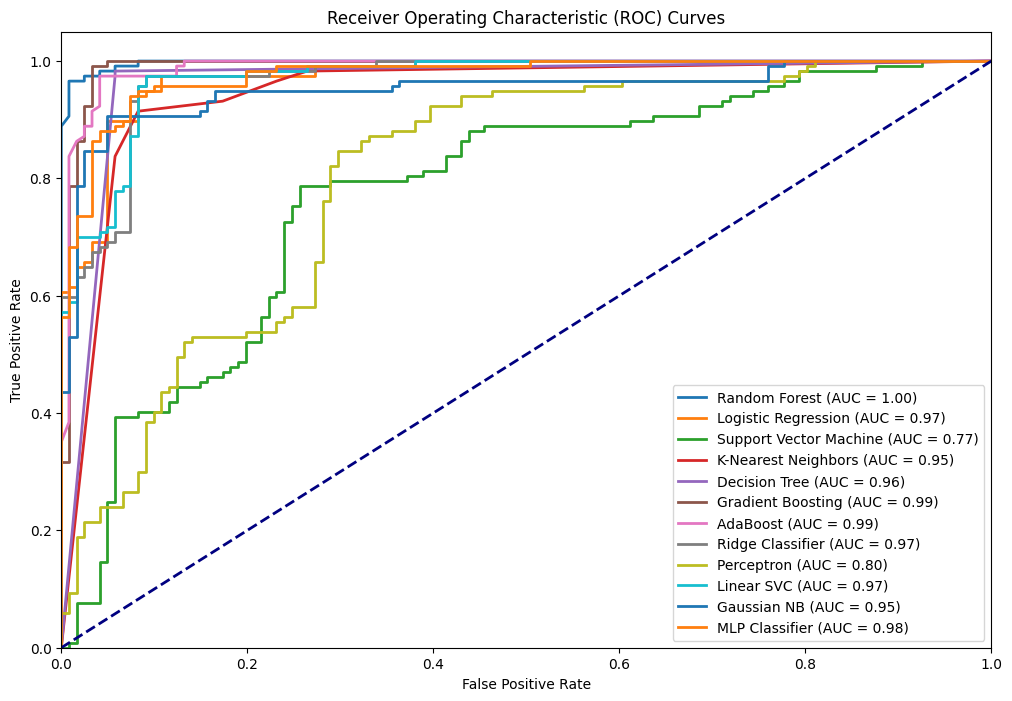

Best Model: Random Forest with Accuracy: 0.9758


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, \
    ExtraTreesClassifier




# Split the data into training and testing sets
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Ridge Classifier': RidgeClassifier(random_state=42),
    'Perceptron': Perceptron(random_state=42),
    'Linear SVC': LinearSVC(random_state=42),
    'Gaussian NB': GaussianNB(),
    'MLP Classifier': MLPClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'Classifier: {name}')
    print(classification_report(y_test, y_pred))
    print('-' * 60)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Evaluate each classifier using cross-validation
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = {
        'accuracy': scores.mean(),
        'precision': cross_val_score(clf, X_train, y_train, cv=5, scoring='precision').mean(),
        'recall': cross_val_score(clf, X_train, y_train, cv=5, scoring='recall').mean(),
        'f1': cross_val_score(clf, X_train, y_train, cv=5, scoring='f1').mean()
    }

# Print the results
best_model = None
best_score = 0
best_clf = None
for name, metrics in results.items():
    print(f'Classifier: {name}')
    for metric, score in metrics.items():
        print(f'{metric.capitalize()}: {score:.4f}')
    print('-' * 60)
    if metrics['accuracy'] > best_score:
        best_score = metrics['accuracy']
        best_model = name
        best_clf = classifiers[name]

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Train and evaluate each classifier
plt.figure(figsize=(12, 8))
for name, clf in classifiers.items():
    clf.fit(A_train, b_train)
    y_pred_prob = clf.predict_proba(A_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(A_test)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(b_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

print(f'Best Model: {best_model} with Accuracy: {best_score:.4f}')




In [ ]:
!pip install lime shap imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0226bb2c30319ca33fee6958ab37f76bdf8c6b4d9564535835677d14f69ecf9f
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd
import os

# Train the best classifier on the entire training set
best_clf.fit(A_train, b_train)

# Use LIME to explain predictions for a few instances
explainer = LimeTabularExplainer(A_train.values, feature_names=A_train.columns, class_names=['No Asthma Attack', 'Asthma Attack'], mode='classification')

# Select a few instances from the test set to explain
instances_to_explain = [0, 1, 2]  # Indices of the instances to explain

for i in instances_to_explain:
    exp = explainer.explain_instance(A_test.iloc[i], best_clf.predict_proba, num_features=10)

    # Save the explanation to a file
    exp.save_to_file(f'lime_explanation_{i}.html')
    print(f"LIME explanation saved to lime_explanation_{i}.html")

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

LIME explanation saved to lime_explanation_0.html


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

LIME explanation saved to lime_explanation_1.html
LIME explanation saved to lime_explanation_2.html


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

<Figure size 640x480 with 0 Axes>

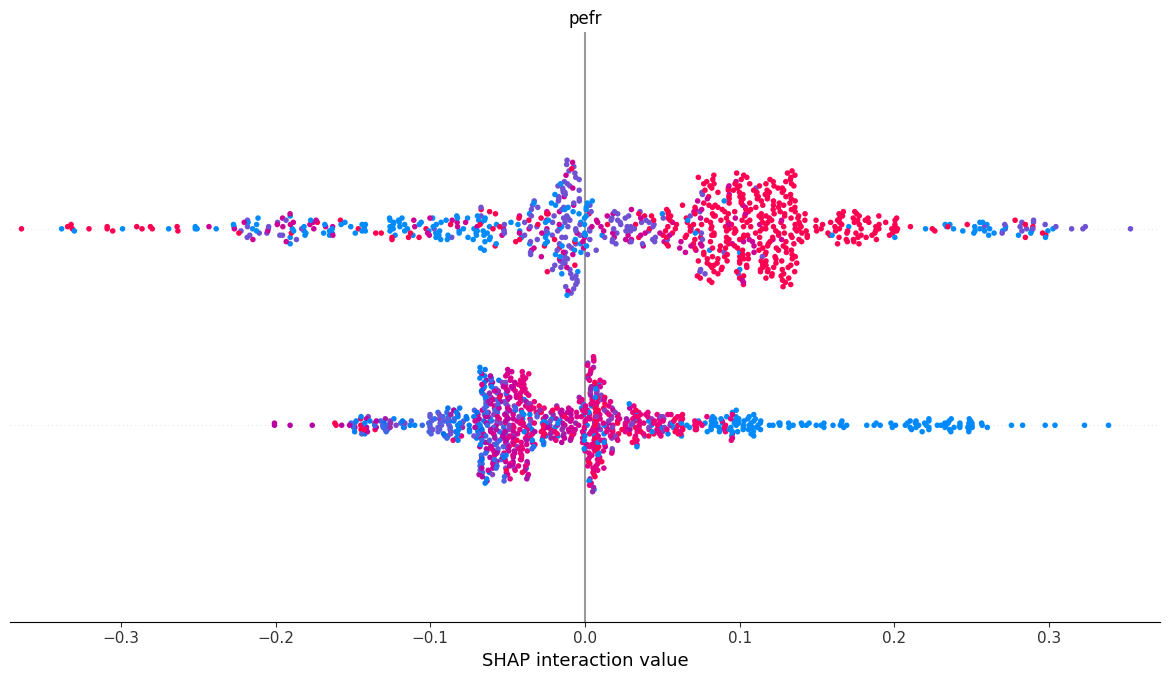

TypeError: `save_html` requires a Visualizer returned by `shap.plots.force()`.

In [ ]:
import shap

# Create a SHAP Tree Explainer for the best model
shap_explainer = shap.TreeExplainer(best_clf)

# Calculate SHAP values for the training features
shap_values = shap_explainer.shap_values(A_train)

# Save the SHAP summary plot to an HTML file
shap.save_html('shap_summary_plot.html', shap.summary_plot(shap_values=shap_values, features=A_train, feature_names=A.columns, plot_type='bar'))

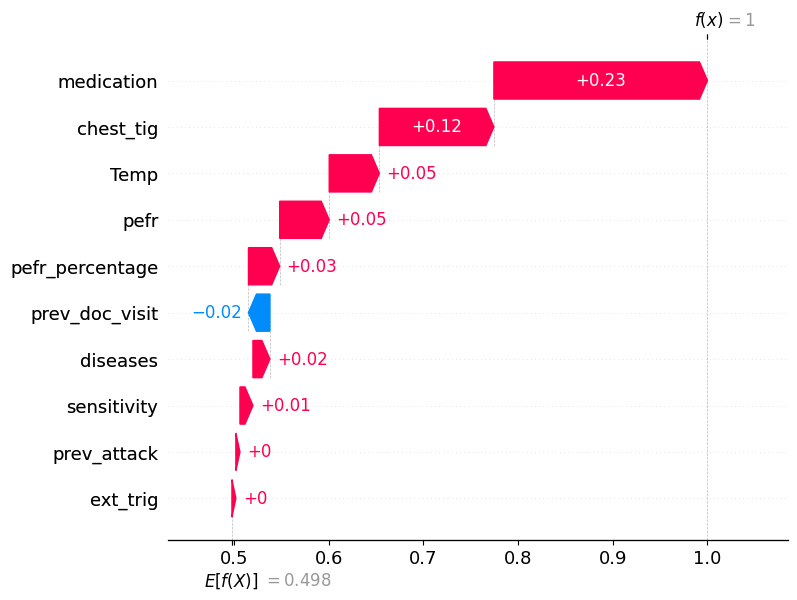

In [ ]:
import shap
import matplotlib.pyplot as plt

# Select a sample instance and class
sample_index = 0  # Choose the sample to explain
class_index = 0   # Choose the class to explain (0 or 1 for binary classification)

# Calculate SHAP values (assumes shap_explainer is already defined)
# SHAP values shape: (num_samples, num_features, num_classes)
shap_values = shap_explainer.shap_values(A_train)

# Extract SHAP values for the selected sample and class
shap_values_for_plot = shap_values[sample_index, :, class_index]

# Verify expected values (assumes a list or array of expected values for each class)
base_value = shap_explainer.expected_value[class_index]  # Base value for the selected class

# Create the SHAP Explanation object
explanation = shap.Explanation(
    values=shap_values_for_plot,
    base_values=base_value,
    feature_names=A.columns
)

# Create the waterfall plot
shap.plots.waterfall(explanation, max_display=10, show=False)

# Display the plot
plt.show()


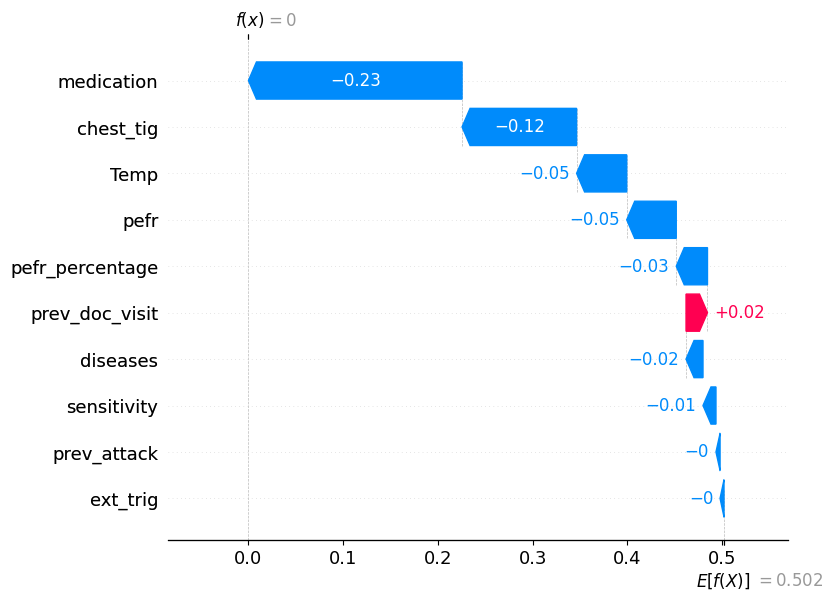

In [ ]:
import shap
import matplotlib.pyplot as plt

# Select a sample instance and class
sample_index = 0  # Choose the sample to explain
class_index = 1  # Choose the class to explain (0 or 1 for binary classification)

# Calculate SHAP values (assumes shap_explainer is already defined)
# SHAP values shape: (num_samples, num_features, num_classes)
shap_values = shap_explainer.shap_values(A_train)

# Extract SHAP values for the selected sample and class
shap_values_for_plot = shap_values[sample_index, :, class_index]

# Verify expected values (assumes a list or array of expected values for each class)
base_value = shap_explainer.expected_value[class_index]  # Base value for the selected class

# Create the SHAP Explanation object
explanation = shap.Explanation(
    values=shap_values_for_plot,
    base_values=base_value,
    feature_names=A.columns
)

# Create the waterfall plot
shap.plots.waterfall(explanation, max_display=10, show=False)

# Display the plot
plt.show()


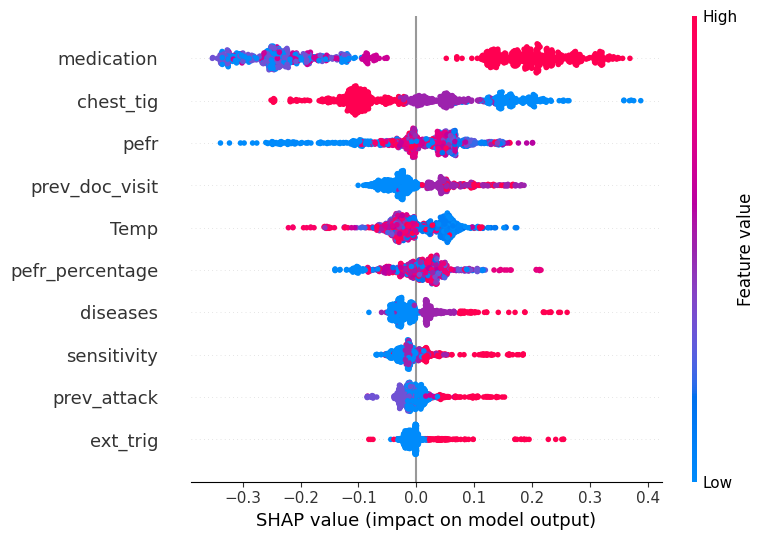

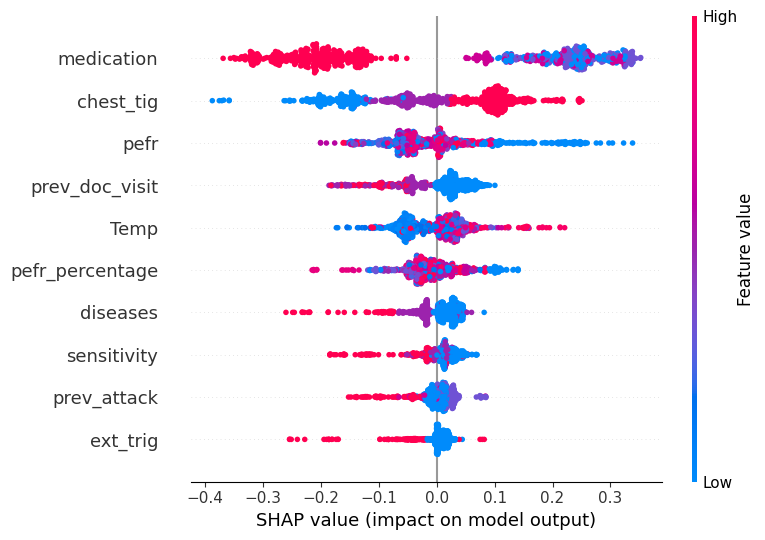

In [ ]:
import shap
import matplotlib.pyplot as plt
import shap
shap.initjs()


# Assume `model` is already trained, and `shap_explainer` has been created
# Calculate SHAP values for all instances in the dataset for binary classification
shap_values = shap_explainer(A_train)

# Select a sample index for individual instance analysis (e.g., index 0)
sample_index = 0


# 2. Summary Plot (Dot Plot)
# Displays the distribution of SHAP values for each feature across the dataset
shap.summary_plot(shap_values[:, :, 0], A_train, plot_type="dot")
plt.show()

shap.summary_plot(shap_values[:, :, 1], A_train, plot_type="dot")
plt.show()


# Example for instance 1
shap.force_plot( shap_values[1, :, 0], A_train.iloc[1, :])



In [ ]:

shap.force_plot( shap_values[2, :, 1], A_train.iloc[2, :])

In [ ]:
import numpy as np
import pandas as pd

# Randomize and create inputs for all the top 10 features
def generate_random_inputs(feature_names, num_samples=10):
    random_inputs = {}
    for feature in feature_names:
        # Generate random values for each feature (assuming a range of 0 to 1 for simplicity)
        random_inputs[feature] = np.random.rand(num_samples)
    return pd.DataFrame(random_inputs)

# Generate random inputs for the top 10 features
random_inputs = generate_random_inputs(top_features_list, num_samples=10)

# Use the model to predict the occurrence of asthma
predictions = best_clf.predict(random_inputs)
prediction_probabilities = best_clf.predict_proba(random_inputs)

# Show a detailed output recording the possibility of an occurrence or not
occurrence_found = False
no_occurrence_found = False

for i in range(len(predictions)):
    if predictions[i] == 1 and not occurrence_found:
        print(f"Example of Asthma Attack Occurrence (Input {i+1}):")
        for feature in top_features_list:
            print(f"  {feature}: {random_inputs.iloc[i][feature]:.4f}")
        print(f"Prediction: Asthma Attack")
        print(f"Probability of No Asthma Attack: {prediction_probabilities[i][0]:.4f}")
        print(f"Probability of Asthma Attack: {prediction_probabilities[i][1]:.4f}")
        print("-" * 60)
        occurrence_found = True
    elif predictions[i] == 0 and not no_occurrence_found:
        print(f"Example of No Asthma Attack Occurrence (Input {i+1}):")
        for feature in top_features_list:
            print(f"  {feature}: {random_inputs.iloc[i][feature]:.4f}")
        print(f"Prediction: No Asthma Attack")
        print(f"Probability of No Asthma Attack: {prediction_probabilities[i][0]:.4f}")
        print(f"Probability of Asthma Attack: {prediction_probabilities[i][1]:.4f}")
        print("-" * 60)
        no_occurrence_found = True

    if occurrence_found and no_occurrence_found:
        break

Example of No Asthma Attack Occurrence (Input 1):
  medication: 0.6217
  pefr: 0.0453
  pefr_percentage: 0.7643
  chest_tig: 0.7774
  prev_attack: 0.7799
  prev_doc_visit: 0.3524
  sensitivity: 0.3658
  Temp: 0.9621
  diseases: 0.1064
  ext_trig: 0.0691
Prediction: No Asthma Attack
Probability of No Asthma Attack: 0.5500
Probability of Asthma Attack: 0.4500
------------------------------------------------------------


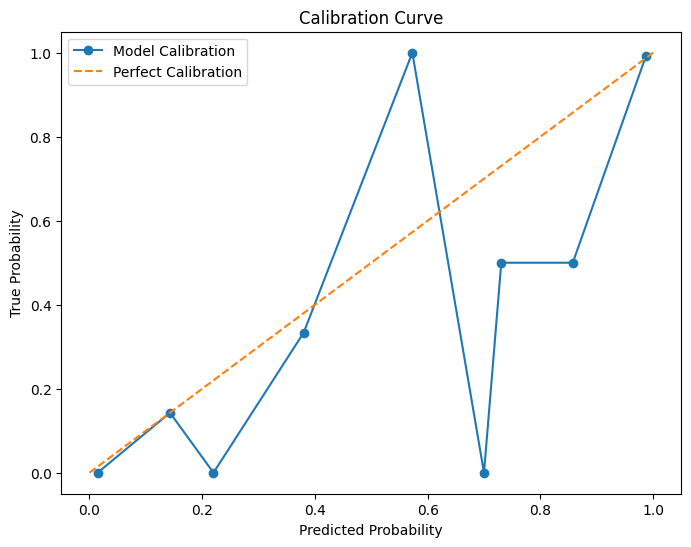

In [ ]:
from sklearn.calibration import calibration_curve

# Calibration curve for the best model
y_prob = best_clf.predict_proba(A_test)[:, 1]  # Predicted probabilities for the positive class
prob_true, prob_pred = calibration_curve(b_test, y_prob, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


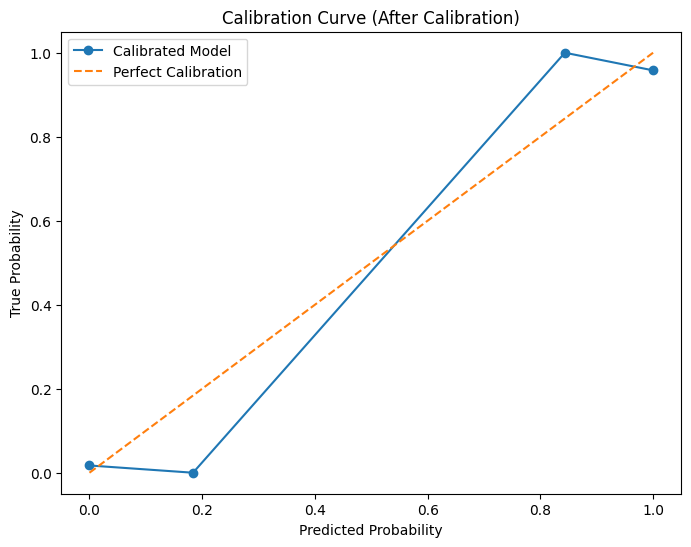

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# Calibrate the best model
calibrated_clf = CalibratedClassifierCV(best_clf, method='isotonic', cv='prefit')
calibrated_clf.fit(A_train, b_train)

# Evaluate the calibrated model
y_calibrated_prob = calibrated_clf.predict_proba(A_test)[:, 1]
prob_true_cal, prob_pred_cal = calibration_curve(b_test, y_calibrated_prob, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='Calibrated Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve (After Calibration)')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


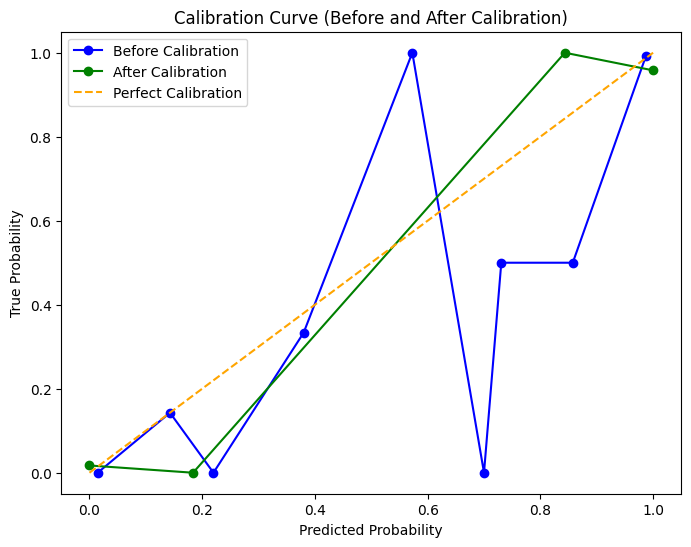

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt

# Calibration curve for the best model (before calibration)
y_prob = best_clf.predict_proba(A_test)[:, 1]  # Predicted probabilities for the positive class
prob_true, prob_pred = calibration_curve(b_test, y_prob, n_bins=10)

# Calibrate the best model
calibrated_clf = CalibratedClassifierCV(best_clf, method='isotonic', cv='prefit')
calibrated_clf.fit(A_train, b_train)

# Calibration curve for the calibrated model (after calibration)
y_calibrated_prob = calibrated_clf.predict_proba(A_test)[:, 1]
prob_true_cal, prob_pred_cal = calibration_curve(b_test, y_calibrated_prob, n_bins=10)

# Plot both calibration curves
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Before Calibration', color='blue')
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='After Calibration', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration', color='orange')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve (Before and After Calibration)')
plt.legend()
plt.show()

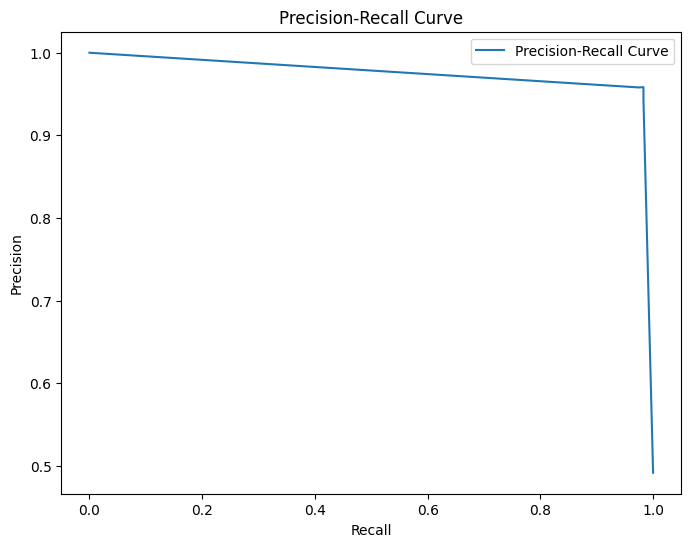

Threshold for high sensitivity: 0.0


In [ ]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(b_test, y_calibrated_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Example: Select threshold for high sensitivity
high_sensitivity_threshold = thresholds_pr[np.argmax(recall >= 0.9)]  # Adjust recall threshold as needed
print(f"Threshold for high sensitivity: {high_sensitivity_threshold}")

In [ ]:
from sklearn.metrics import brier_score_loss

# Calculate and display Brier scores
print("\nBrier Scores (lower is better):")
for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        y_pred_prob = clf.predict_proba(A_test)[:, 1]
        brier = brier_score_loss(b_test, y_pred_prob)
        print(f"{name}: {brier:.4f}")


Brier Scores (lower is better):
Random Forest: 0.0220
Logistic Regression: 0.0628
K-Nearest Neighbors: 0.0822
Decision Tree: 0.0389
Gradient Boosting: 0.0223
AdaBoost: 0.1483
Gaussian NB: 0.0980
MLP Classifier: 0.0721
